In [17]:
import yaml
from linkml.generators import shaclgen, owlgen
from linkml.validator import validate

from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
good_instance = {
    "id": "ORCID:1234",
    "full_name": "Clark Kent",
    "age": 32,
    "phone": "555-555-5555"
}

bad_instance = {
    "id": "ORCID:1234",
    "full_name": "Clark Kent",
    "age": 32,
    "phone": "555-555-5555",
    "test": "asdksjdskd"
}

In [9]:
def check_instance(instance):
    report = validate(
        instance, "/Users/maximilianstaebler/code/DLR/GX4FM-Base-X/SemanticDataLink/linkml/yaml/personinfo.yaml", "Person"
    )

    if not report.results:
        print('The instance is valid!')
    else:
        for result in report.results:
            print(result.message)

In [10]:
check_instance(good_instance)
check_instance(bad_instance)

The instance is valid!
Additional properties are not allowed ('test' was unexpected) in /


In [13]:
with open('/Users/maximilianstaebler/code/DLR/GX4FM-Base-X/SemanticDataLink/linkml/roaddamage.yaml', 'r') as file:
    input_yaml = yaml.safe_load(file)

shaclGraph = shaclgen.ShaclGenerator(str(input_yaml)).as_graph()
owlGraph = owlgen.OwlSchemaGenerator(str(input_yaml)).as_graph()

print(shaclGraph.serialize())
print(owlGraph.serialize())

# metamodel_version: 1.7.0
@prefix base-x: <http://www.base-x/model/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix sh: <http://www.w3.org/ns/shacl#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

base-x:Roaddamage a sh:NodeShape ;
    sh:closed true ;
    sh:ignoredProperties ( rdf:type ) ;
    sh:name "Road damage" ;
    sh:property [ sh:datatype xsd:dateTime ;
            sh:description "At what time this situation was last observed." ;
            sh:maxCount 1 ;
            sh:minCount 1 ;
            sh:name "last observation" ;
            sh:order 4 ;
            sh:path base-x:lastObservation ],
        [ sh:datatype xsd:float ;
            sh:description "Heading information." ;
            sh:maxCount 1 ;
            sh:minCount 1 ;
            sh:name "heading" ;
            sh:order 5 ;
            sh:path base-x:heading ],
        [ sh:datatype xsd:float ;
            sh:maxCount 1 ;
            sh:minCount 1 ;
            sh:name "longitud

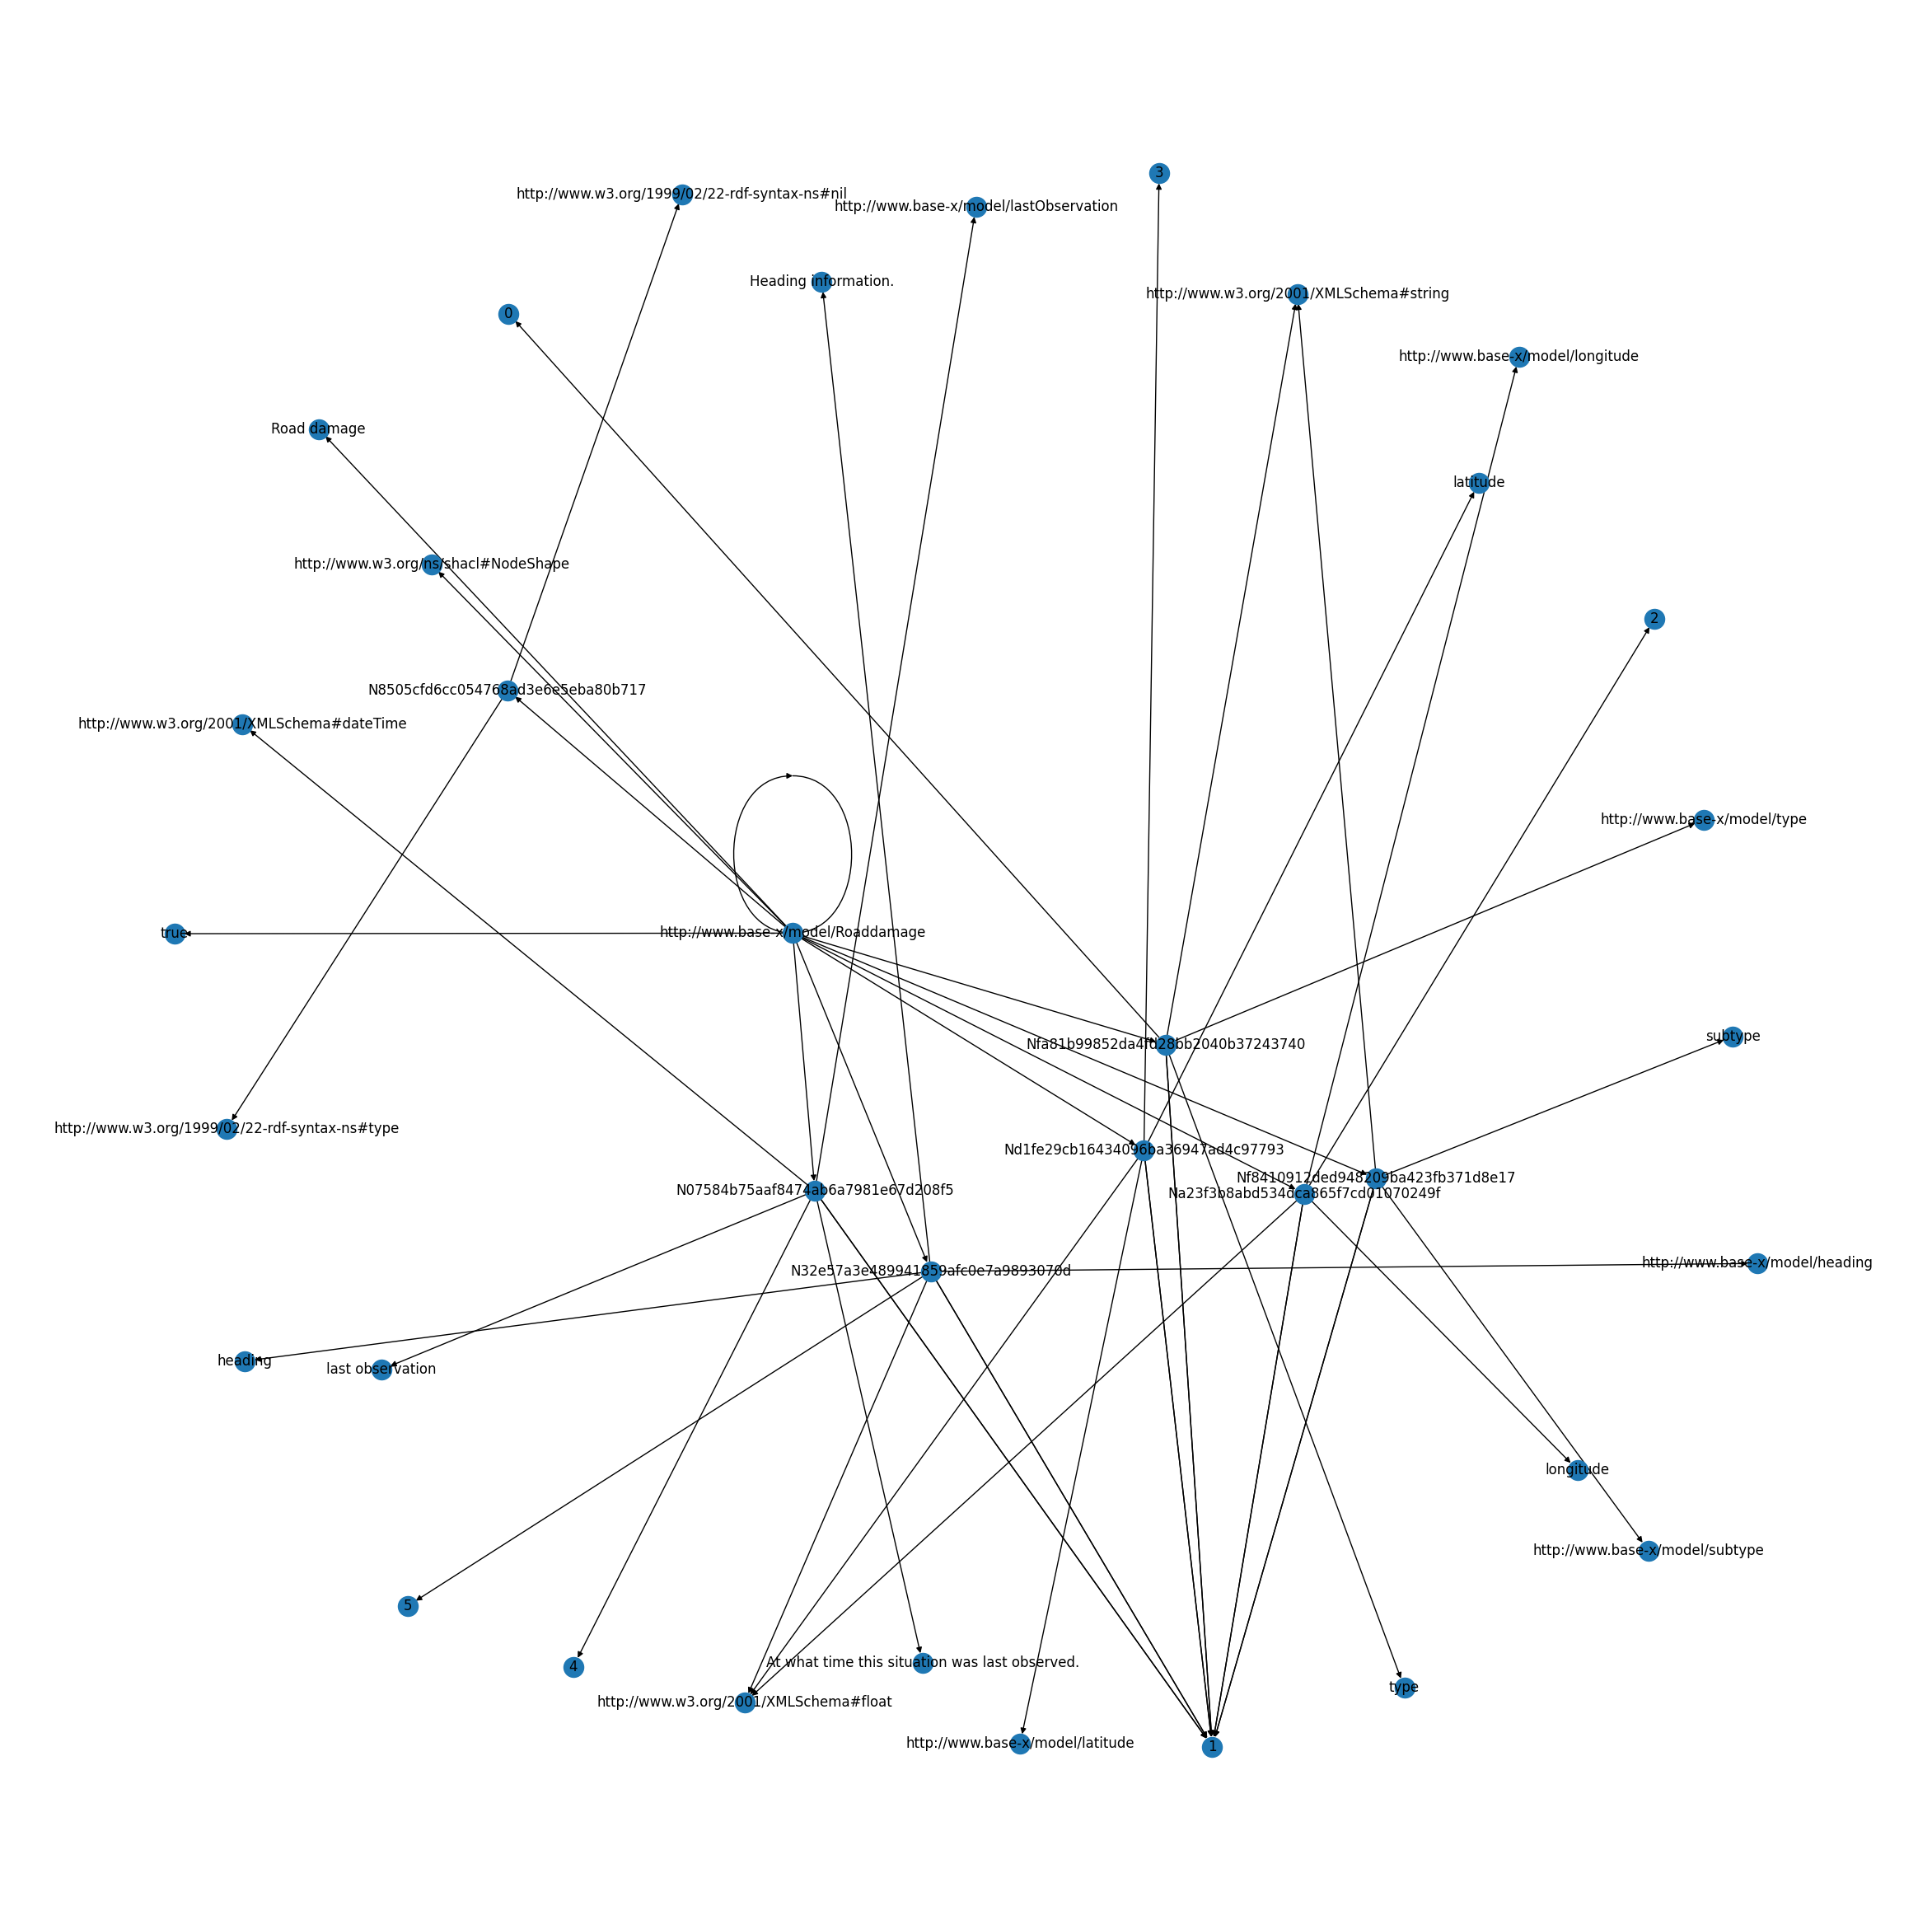

In [21]:
G = rdflib_to_networkx_multidigraph(shaclGraph)

plt.figure(figsize=(30,30))

# Plot Networkx instance of RDF Graph
pos = nx.spring_layout(G, scale=2)
edge_labels = nx.get_edge_attributes(G, 'r')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

nx.draw(G, with_labels=True)

#if not in interactive mode for 
plt.show()